In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from predict import predict_img, read_image_from_url

## Funciones de perdida y precisión

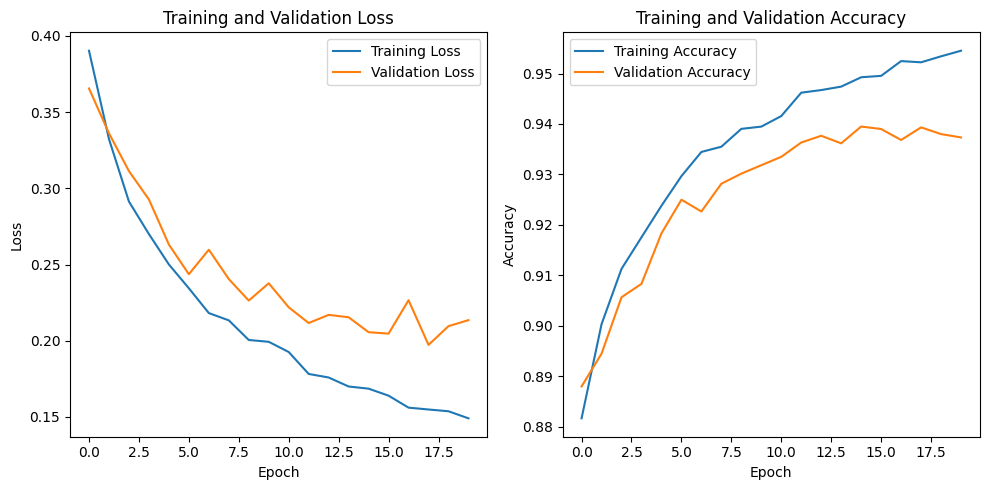

In [5]:
history = np.load('training_history.npy', allow_pickle=True).item()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Las evoluciones de las funciones de perdida y accuracy siguen el movimiento esperado con una tendencia a la estabilidad.

## Precision final

In [6]:
loaded_data = np.load('data/data.npz')
testX = loaded_data['testX']
testY = loaded_data['testY']

model = load_model("trained_models/lenet_best.h5")
_, acc = model.evaluate(testX, testY)
print(acc * 100.0)



313/313 [==============================] - 2s 4ms/step - loss: 0.4493 - accuracy: 0.8709
87.08999752998352


La precisión del modelo es de 87%, 17% mas de lo requierido. El modelo es aprobado.

## Funcionamiento del modelo

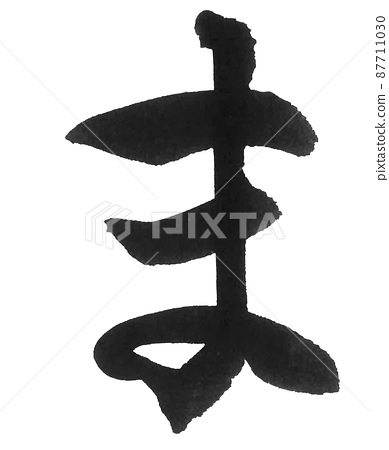

In [12]:
ma_letter = read_image_from_url("https://en.pimg.jp/087/711/030/1/87711030.jpg")
ma_letter

In [13]:
predict_img("https://en.pimg.jp/087/711/030/1/87711030.jpg")

'ma'

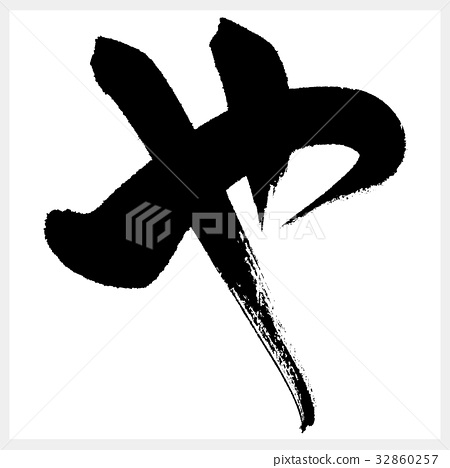

In [11]:
ya_letter = read_image_from_url("https://en.pimg.jp/032/860/257/1/32860257.jpg")
ya_letter

In [10]:
predict_img("https://en.pimg.jp/032/860/257/1/32860257.jpg")

'ya'

El modelo funciona bastante bien para imagenes mucho mas grandes que con las que se entrenó.